
# Portfolio Optimization on the daily return of 40 Industries from 1926

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import time

In [2]:
# Standard plotly imports
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='Abcde54321',                                              
                                  api_key='hcooLngkiMrN7qXHBs5s')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('48_Industry_Portfolios_daily.CSV', index_col = 0)
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.



,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
19260701,0.56,-0.07,NaN,-1.39,0,-1.44,0.62,-1.27,-0.9,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
19260702,0.29,0.06,NaN,0.78,0.7,1.46,0.03,0,-0.34,-0.35,...,1.07,0.06,0,0.01,-0.1,1.04,-0.03,-0.61,-0.45,3.09
19260706,-0.33,0.18,NaN,-1.74,0.5,-0.96,-0.06,4.27,-1.2,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
19260707,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.1,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.7,-1.09,0.21,0.07,-0.4,0.62
19260708,0.3,1.12,NaN,-0.15,0.3,-0.49,0.24,0,-0.01,0.79,...,-0.39,0.46,-1.1,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [4]:
df = df.loc[df.index != '  Average Equal Weighted Returns -- Daily']
df.index = pd.to_datetime(df.index.astype(str), format='%Y%m%d')
df['Soda '].loc[df['Soda '] == ' NaN'] = None
df = df.sort_index()
df = df[:-1]

In [5]:
df.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'],
      dtype='object')

We have noticed the fact that there are two sets of data in the main dataset, so every day is reported twice, once for each set of data. The difference between the two is that in one case the industrial index is computed averaging over the stocks of that industry with equal weight, in the other case stocks are weighted by market capitalization. As we do not know which version of the day corresponds to which method of computing, we have decided to only keep the first appearance of every date.

In [7]:
df = df.groupby(df.index).first()

We will make this study, on two different datasets and here are the justification of it:
- First, we are using the whole dataset, that is to say daily returns of 40 industries (we took out soda, rubber, health, FabPr (Fabric Products), guns, gold, PerSv (personal service), and paper as it had missing values)
- Second, we are using values since 2001-2007 to train the dataset and the 2007-2008 financial crisis as testing dataset. We chose this interval to look at how a portfolio made before a financial crisis would work during the financial crisis.

## Whole timescale X 40 Industries

### Correlation

In [8]:
df1 = df
del df1['Soda ']
del df1['Rubbr']
del df1['Hlth ']
del df1['Guns ']
del df1['Gold ']
del df1['FabPr']
del df1['PerSv']
del df1['Paper']

In [9]:
for i in df1.columns:
    df1[i] = df1[i].astype(float)

In [10]:
corr = df1.corr(method='pearson')
corr

,Agric,Food,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,MedEq,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,1.000000,0.399972,0.299705,0.257147,0.261100,0.315077,0.273528,0.372050,0.335210,0.256675,...,0.353586,0.402192,0.264446,0.401619,0.311338,0.333711,0.320866,0.252866,0.369010,0.274781
Food,0.399972,1.000000,0.593007,0.508454,0.434977,0.593544,0.499609,0.706633,0.599293,0.484035,...,0.646967,0.704469,0.479375,0.746193,0.589791,0.601211,0.582990,0.432151,0.678892,0.504463
Beer,0.299705,0.593007,1.000000,0.368139,0.346285,0.484118,0.350632,0.534181,0.419098,0.349768,...,0.459381,0.540398,0.368069,0.553858,0.446379,0.455551,0.427462,0.331601,0.516335,0.392023
Smoke,0.257147,0.508454,0.368139,1.000000,0.285912,0.394130,0.322599,0.458054,0.387691,0.321350,...,0.411493,0.449235,0.299942,0.482088,0.385694,0.387889,0.376028,0.267836,0.417565,0.336812
Toys,0.261100,0.434977,0.346285,0.285912,1.000000,0.402023,0.354482,0.431163,0.394642,0.304954,...,0.398573,0.454625,0.331469,0.480692,0.404528,0.375630,0.331300,0.312966,0.425987,0.340449
Fun,0.315077,0.593544,0.484118,0.394130,0.402023,1.000000,0.444821,0.593281,0.490250,0.413090,...,0.551673,0.650987,0.413806,0.664360,0.537948,0.540468,0.506306,0.412089,0.631184,0.459906
Books,0.273528,0.499609,0.350632,0.322599,0.354482,0.444821,1.000000,0.480341,0.459585,0.351909,...,0.459316,0.523969,0.372809,0.546744,0.431396,0.437748,0.416068,0.365945,0.496117,0.369604
Hshld,0.372050,0.706633,0.534181,0.458054,0.431163,0.593281,0.480341,1.000000,0.572823,0.462974,...,0.610801,0.675947,0.461083,0.725556,0.579185,0.576293,0.556835,0.418300,0.655906,0.489660
Clths,0.335210,0.599293,0.419098,0.387691,0.394642,0.490250,0.459585,0.572823,1.000000,0.410465,...,0.544435,0.602389,0.431202,0.672382,0.526817,0.507909,0.491811,0.392918,0.566429,0.443293
MedEq,0.256675,0.484035,0.349768,0.321350,0.304954,0.413090,0.351909,0.462974,0.410465,1.000000,...,0.432869,0.466718,0.348329,0.507784,0.423079,0.400665,0.395487,0.291649,0.442033,0.359126


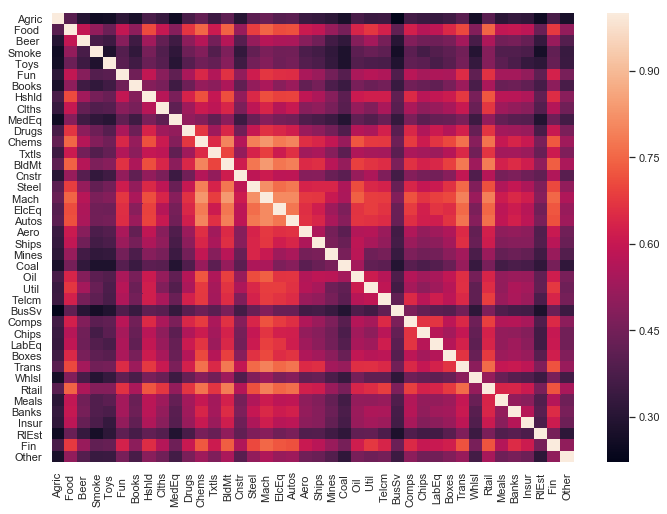

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Time Series Cross Validation

In [12]:
len(df1)*0.8

19279.2

In [13]:
X_train = df1[:19279]
X_test = df1[19279:]

### Portfolio Optimization

In [76]:
def portfolio_daily_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*len(X_test)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_test))
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2* np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [77]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [78]:
mean_returns = X_test.mean()
cov_matrix = X_test.cov()
num_portfolios = 100000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 561.16
Volatility: 85.18


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   4.63   0.04    8.7  23.92  -4.89  21.68 -10.47  17.78  22.63   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   2.84  ...   -10.18 -15.73   6.62  -8.27  19.41 -18.85  -4.35   

            RlEst  Fin    Other  
allocation   8.31 -13.35  11.76  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 377.09
Volatility: 66.8


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   3.15  21.31  14.35  19.18  20.01   3.14 -15.77   6.07  13.31   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  -0.66  ...   -11.21 -21.02   8.02  -13.6

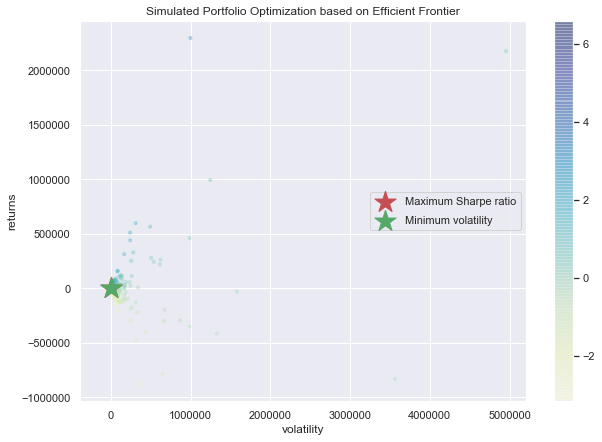

In [79]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [80]:
(377.09 - 0.0178)/66.8

5.644793413173653

In [43]:
Test_B = np.dot(min_vol_allocation.values, X_test.T.values)
Test_B.std()

123.80648635445816

In [73]:
np.sum(X_train.mean()*min_vol_allocation.values[0]/100)*len(X_train)

1057.6551929999998

In [75]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

2.759008449864627

In [49]:
Test_A = np.dot(min_vol_allocation.values, X_train.T.values)
Test_A.std()

88.5325334462296

#### Train Test Part

In [19]:
import scipy.optimize as sco
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_daily_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

##### Train

In [20]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178
result_train = min_variance(mean_returns, cov_matrix)

##### Test

- MSE-Returns and Volatility

In [21]:
mean_returns = X_test.mean()
cov_matrix = X_test.cov()
num_portfolios = 20000
risk_free_rate = 0.0178
result_test = min_variance(mean_returns, cov_matrix)

In [22]:
from sklearn.metrics import mean_squared_error
Test_A = np.dot(result_train.x, X_test.T.values)
Test_B = np.dot(result_test.x, X_test.T.values)
MSE = mean_squared_error(Test_B, Test_A)
print( "MSE:", round(MSE,3))
Diff_vol = Test_A.std() - Test_B.std()
print("Difference of volatility:", Diff_vol)
Vol = Test_A.std()
print('Volatility:', Vol)

MSE: 0.368
Difference of volatility: 0.21641267458585922
Volatility: 0.9593572539423745


### Portfolio Optimization - LASSO Regularized

In [177]:
def portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(df1)) + lam*np.sum(np.absolute(weights))
    return std, returns
  
def random_portfolios1(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2* np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [178]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam):
    results, weights = random_portfolios1(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [181]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_lasso[np.argmin(vol_lasso)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 1251.96
Volatility: 144.14


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   1.33   5.88  -1.23  13.46 -11.55   1.79   9.69  14.49   6.92   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  -5.83  ...     4.91 -15.08  10.04   8.19   4.11  13.92   4.91   

            RlEst  Fin    Other  
allocation  -8.41   6.05   8.92  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 1122.57
Volatility: 140.8


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   5.46  13.07   5.48  10.89   1.55  -8.72  12.78  10.86  -2.47   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   7.77  ...     8.79  -4.19  -5.55  -

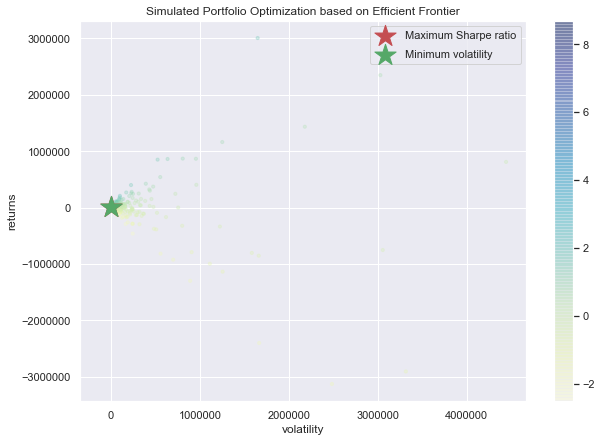

In [182]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam)

In [76]:
lam

0.33

In [81]:
min_vol_allocation.values

array([[  8.81,  13.43,   4.84,   1.31,  -0.92, -10.07,  -7.38,  -4.93,
          9.9 ,   5.34,   6.19,  12.64,   4.68,  12.11,  -3.46,  -0.86,
         -3.11,  -7.69,  -9.68,  -4.44,  13.7 ,  11.06,  -3.19,  -3.44,
         10.85,  13.11,  -0.04,  -3.88,  -4.82,   3.81,  14.42, -13.9 ,
          7.37,   8.02,   2.42,   2.88,  11.02,  -5.94,   5.74,   4.14]])

In [83]:
Test_B = np.dot(min_vol_allocation, X_test.T.values)
Test_B.std()

106.06227568026526

In [81]:
min_vol_allocation = np.array([  8.81,  13.43,   4.84,   1.31,  -0.92, -10.07,  -7.38,  -4.93,
          9.9 ,   5.34,   6.19,  12.64,   4.68,  12.11,  -3.46,  -0.86,
         -3.11,  -7.69,  -9.68,  -4.44,  13.7 ,  11.06,  -3.19,  -3.44,
         10.85,  13.11,  -0.04,  -3.88,  -4.82,   3.81,  14.42, -13.9 ,
          7.37,   8.02,   2.42,   2.88,  11.02,  -5.94,   5.74,   4.14])

In [84]:
(np.sum(X_test.mean()*min_vol_allocation/100)*len(X_test) - risk_free_rate) / Test_B.std()

3.2883969042057406

#### Finding the best lambda by GridSearch

In [48]:
mean_returns = X_test.mean()
cov_matrix = X_test.cov()
num_portfolios = 50000
risk_free_rate = 0.0178
results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation_test = min_vol_allocation.T
Test_B = np.dot(min_vol_allocation_test.values, X_test.T.values)

In [49]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
lams = np.arange(0,1,0.01)
vol = []
mses = []
for lam in lams: 
    results, weights = random_portfolios1(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam)
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation_train = min_vol_allocation.T
    Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
    MSE = mean_squared_error(Test_B, Test_A)
    vol.append(Test_A.std())
    mses.append(MSE)

In [53]:
lams_lasso = lams
vol_lasso = vol
mses_lasso = mses

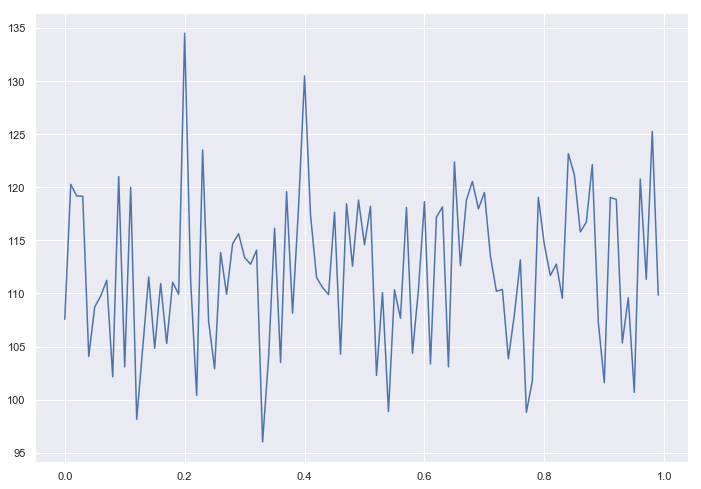

In [54]:
sns.lineplot(x = lams_lasso, y = vol_lasso)

In [64]:
np.dot(min_vol_allocation_train.values, X_test.T.values)

96.02728938078126

### Portfolio Optimization - Ridge Regularization

In [138]:
def portfolio_daily_performance2(weights, mean_returns, cov_matrix, lam):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(df1)) + lam*np.sum(weights**2)
    return std, returns
  
def random_portfolios2(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance2(weights, mean_returns, cov_matrix, lam)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [139]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam):
    results, weights = random_portfolios2(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [140]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_ridge[np.argmin(vol_ridge)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 1404.31
Volatility: 164.84


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation  -7.09  14.29  -7.88  12.26  14.34   8.73   9.48 -13.92  14.14   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   8.86  ...     10.7   0.28   7.85    9.2 -15.59   9.71  15.53   

            RlEst  Fin    Other  
allocation  -2.66  13.68  -7.05  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 1054.5
Volatility: 141.54


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   7.12  11.23  -6.46   4.73   0.57   3.15   9.83   9.59  10.58   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  11.18  ...     4.89  -7.94  -5.78   

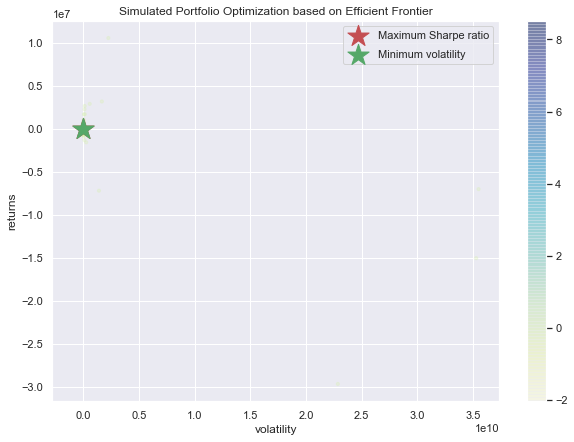

In [141]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam)

In [85]:
min_vol_allocation = np.array([  7.12,  11.23,  -6.46,   4.73,   0.57,   3.15,   9.83,   9.59,
         10.58,  11.18,   3.34, -11.33,   5.27,  10.55,   4.7 ,   6.92,
          6.67, -11.34, -11.31,  -9.71,  11.29,   2.95,   1.23,  -1.41,
          9.69,   3.85,  -2.6 ,  -0.56,  -5.29, -10.14,   4.89,  -7.94,
         -5.78,   4.68,   8.57,  10.68,   3.69,   1.82,   9.82,   5.29])

In [87]:
Test_B = np.dot(min_vol_allocation, X_test.T.values)
Test_B.std()

117.0951649242395

In [88]:
(np.sum(X_test.mean()*min_vol_allocation/100)*len(X_test) - risk_free_rate) / Test_B.std()

2.875096142678636

#### Finding the best Lambda

In [84]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [85]:
lams = np.arange(0,1,0.01)
vol = []
mses = []
for lam in lams: 
    results, weights = random_portfolios2(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam)
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation_train = min_vol_allocation.T
    Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
    MSE = mean_squared_error(Test_B, Test_A)
    vol.append(Test_A.std())
    mses.append(MSE)

In [86]:
lams_ridge = lams
vol_ridge = vol
mses_ridge = mses

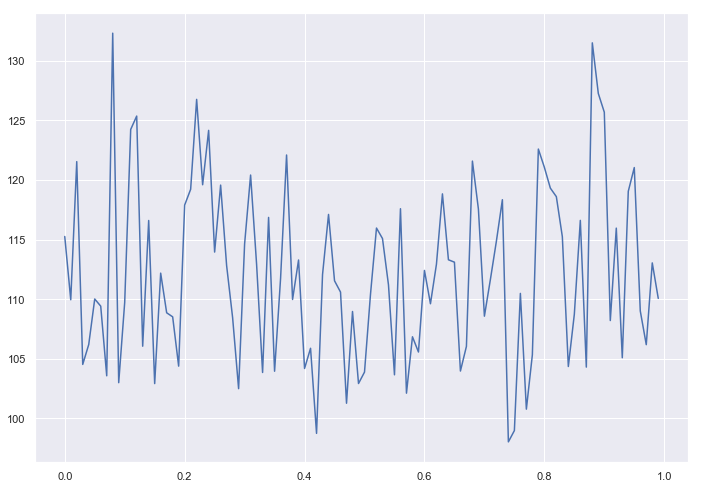

In [87]:
sns.lineplot(x = lams_ridge, y = vol_ridge)

### Portfolio Optimization - Elastic Net Regularization

In [131]:
def portfolio_daily_performance3(weights, mean_returns, cov_matrix, lam, alpha):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(df1)) + lam*np.sum((0.5-alpha/2)*weights**2 + alpha*np.absolute(weights))
    return std, returns
  
def random_portfolios3(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam, alpha):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance3(weights, mean_returns, cov_matrix, lam, alpha)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [132]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, alpha):
    results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, alpha)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [133]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_EN[np.argmin(vol_EN)]
alpha = 0.6

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 1288.17
Volatility: 149.52


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation  -3.35    7.5  -3.16  13.52   8.34  14.18  10.24    4.7  10.05   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  11.18  ...      3.6   0.62  -3.69  -8.25  -4.32   12.4  12.85   

            RlEst  Fin    Other  
allocation  -0.17 -13.96   2.05  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 1067.86
Volatility: 135.48


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   7.13  10.52  -1.13   6.12   2.59  -7.39   0.01   9.79   8.02   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   7.87  ...    -1.81  10.11   2.04  

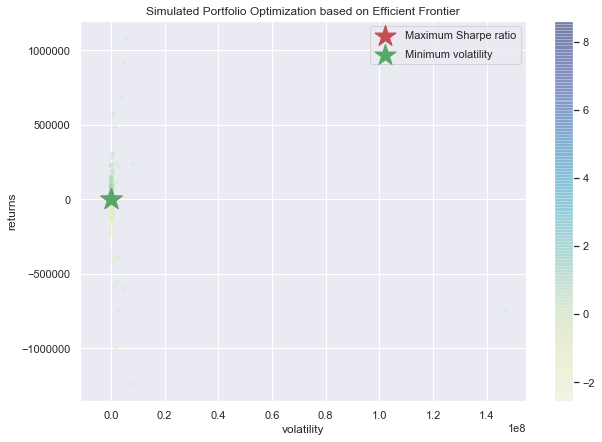

In [134]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, alpha)

In [89]:
min_vol_allocation = np.array([ 7.130e+00,  1.052e+01, -1.130e+00,  6.120e+00,  2.590e+00,
        -7.390e+00,  1.000e-02,  9.790e+00,  8.020e+00,  7.870e+00,
         6.000e-01,  2.620e+00,  7.950e+00,  5.330e+00, -1.035e+01,
        -8.030e+00,  8.980e+00, -4.140e+00, -8.220e+00, -9.060e+00,
         6.800e-01,  6.340e+00,  2.080e+00,  1.070e+01,  4.650e+00,
         5.160e+00, -6.980e+00,  2.260e+00, -3.120e+00,  4.720e+00,
        -1.810e+00,  1.011e+01,  2.040e+00,  9.600e+00, -1.280e+00,
         5.340e+00,  1.500e+00,  1.300e-01,  9.380e+00,  9.280e+00])

In [90]:
Test_B = np.dot(min_vol_allocation, X_test.T.values)
Test_B.std()

107.25824573924497

In [91]:
(np.sum(X_test.mean()*min_vol_allocation/100)*len(X_test) - risk_free_rate) / Test_B.std()

3.0225693583330675

### Finding the best lambda and alpha

In [119]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [125]:
lams = np.arange(0,1,0.1)
alphas = [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
vol = []
mses = []
for alpha in alphas: 
    for lam in lams:
        results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, alpha)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

In [126]:
np.argmin(vol)

40

In [127]:
lams = np.arange(0,1,0.01)
alphas = [0.6]
vol = []
mses = []
for alpha in alphas: 
    for lam in lams:
        results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, alpha)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

In [128]:
lams_EN = lams
vol_EN = vol
mses_EN = mses

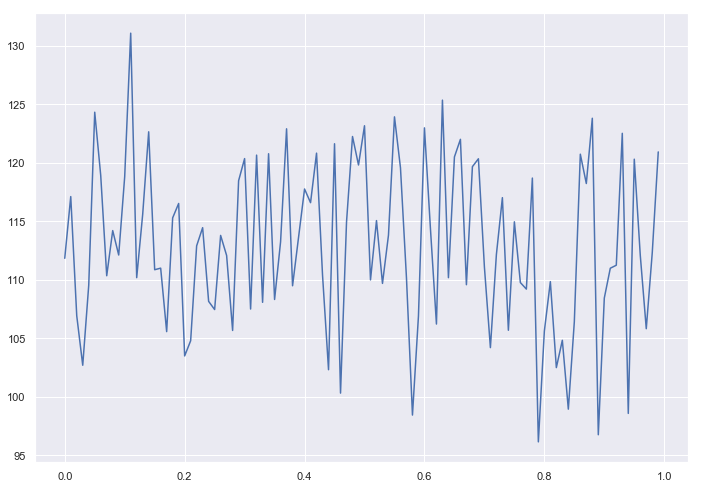

In [130]:
sns.lineplot(x = lams, y = vol)

### Portfolio Optimization : Lq Regularization

In [152]:
def portfolio_daily_performance4(weights, mean_returns, cov_matrix, lam, q):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(df1)) + lam*np.sum(np.absolute(weights)**q)
    return std, returns
  
def random_portfolios4(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam, q):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2* np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance4(weights, mean_returns, cov_matrix, lam, q)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [153]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, q):
    results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, q)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [156]:
mean_returns = df1.mean()
cov_matrix = df1.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
q = 0.6
lam = lams_Lq[np.argmin(vol_Lq)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 1221.09
Volatility: 145.89


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation  -4.41  10.55   13.5  13.29  -8.67   8.42   1.08 -11.61  11.31   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  10.03  ...     2.39   4.49  13.08   9.98   6.65  -0.16   3.31   

            RlEst  Fin    Other  
allocation  -4.38   3.96  -1.03  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 1072.83
Volatility: 140.24


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   2.64   8.58  13.39  11.08   7.45  -8.21   0.17   9.05  12.08   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  13.85  ...    -7.66 -11.55   5.82  

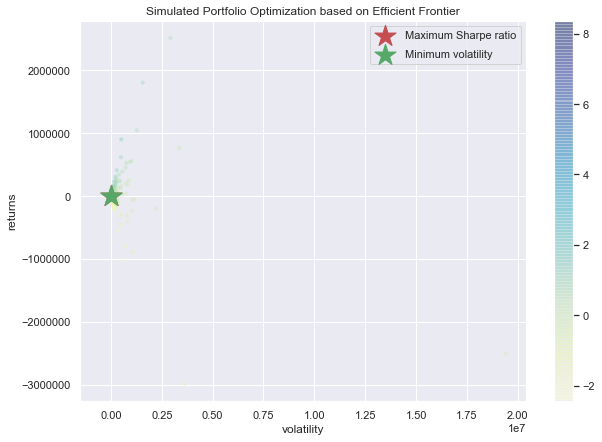

In [157]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, q)

In [92]:
min_vol_allocation = np.array([2.64,   8.58,  13.39,  11.08,   7.45,  -8.21,   0.17,   9.05,
         12.08,  13.85,   2.54,   4.66,  11.26,   3.26,  -5.89, -13.74,
         -1.14, -11.76,   2.09,  -3.36,   5.74,   8.67,  -7.6 ,   7.69,
         12.75,   5.73,  -9.21,  -3.43, -14.  ,  11.92,  -7.66, -11.55,
          5.82,  10.91,  11.85,  14.18,   7.66,   0.35,  -3.08,  -4.75])

In [93]:
Test_B = np.dot(min_vol_allocation, X_test.T.values)
Test_B.std()

95.6182396735568

In [94]:
(np.sum(X_test.mean()*min_vol_allocation/100)*len(X_test) - risk_free_rate) / Test_B.std()

3.568310503988059

### Finding the best lambda and q

In [147]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [148]:
lams = np.arange(0,1,0.1)
qs = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
vol = []
mses = []
for q in qs: 
    for lam in lams:
        results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, q)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

KeyboardInterrupt: 

In [60]:
np.argmin(vol)

39

In [149]:
lams = np.arange(0,1,0.01)
qs = [0.6]
vol = []
mses = []
for q in qs: 
    for lam in lams:
        results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, q)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

In [150]:
lams_Lq = lams
vol_Lq = vol
mses_Lq = mses

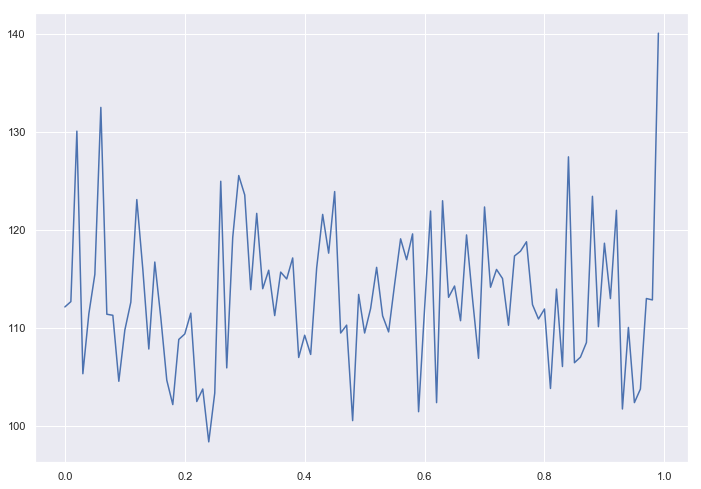

In [151]:
sns.lineplot(x = lams_Lq, y = vol_Lq)

### Portfolio Optimization: SCAD Regularization

In [165]:
def portfolio_daily_performance5(weights, mean_returns, cov_matrix, lam, a):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(df1))
    for i in range(len(weights)):
        if weights[i] < lam: 
            std = std + lam*weights[i]
        if (weights[i] < a*lam) and (weights[i] >= lam):
            std = std + (2*np.absolute(weights[i])*a*lam - weights[i]**2 - lam**2)/(2*(a-1))
        else: 
            std = std + 0.5*(a+1)*lam**2
    return std, returns
  
def random_portfolios5(num_portfolios, mean_returns, cov_matrix, risk_free_rate, lam, a):
    results = np.zeros((39,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2* np.random.random(40) -1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance5(weights, mean_returns, cov_matrix, lam, a)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [166]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, a):
    results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, a)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [167]:
mean_returns = df1.mean()
cov_matrix = df1.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_scad[np.argmin(vol_scad)]
a = 0.8

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 1528.29
Volatility: 219.9


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation  -9.45  19.84  11.85  10.82   2.76  17.83  14.85  -3.65   8.91   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  18.04  ...    -2.13 -15.81   4.66 -12.68  -6.65   0.09    3.3   

            RlEst  Fin    Other  
allocation  -2.52   19.5   7.19  

[1 rows x 40 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 1080.99
Volatility: 177.05


            Agric  Food   Beer   Smoke  Toys   Fun    Books  Hshld  Clths  \
allocation   6.47   5.81   7.11   2.57  -9.56    0.0    7.8  17.77   6.95   

            MedEq  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   5.56  ...      4.7 -13.39  -0.56   

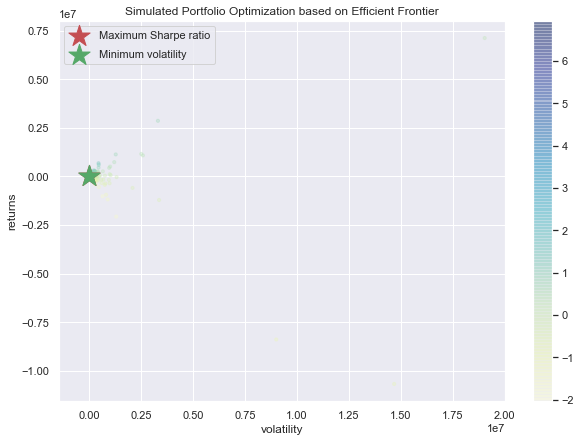

In [168]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, a)

In [95]:
min_vol_allocation = np.array([  6.47,   5.81,   7.11,   2.57,  -9.56,   0.  ,   7.8 ,  17.77,
          6.95,   5.56,  -4.87,  11.48,   8.48,   7.88, -10.13,  -7.06,
         -5.35,  -6.53, -17.97,  -7.44,   7.28,  17.21, -11.42,   6.15,
         16.39,  12.88,  16.31,  -5.76, -10.38, -11.46,   4.7 , -13.39,
         -0.56,   5.98,   8.93,  11.1 ,  16.23,  -9.52,   8.67,  11.66])

In [96]:
Test_B = np.dot(min_vol_allocation, X_test.T.values)
Test_B.std()

103.22389878084505

In [97]:
(np.sum(X_test.mean()*min_vol_allocation/100)*len(X_test) - risk_free_rate) / Test_B.std()

3.4009340002292694

### Finding best lambda and a

In [161]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [70]:
lams = np.arange(0,1,0.1)
aas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
vol = []
mses = []
for a in aas: 
    for lam in lams:
        results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, a)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

In [71]:
np.argmin(vol)

48

In [162]:
lams = np.arange(0,1,0.01)
aas = [0.8]
vol = []
mses = []
for a in aas: 
    for lam in lams:
        results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, a)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        MSE = mean_squared_error(Test_B, Test_A)
        vol.append(Test_A.std())
        mses.append(MSE)

In [163]:
lams_scad = lams
vol_scad = vol
mses_scad = mses

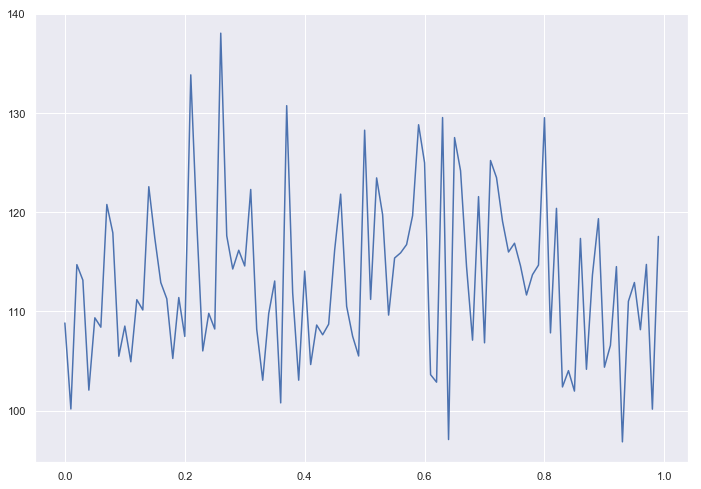

In [164]:
sns.lineplot(x = lams_scad, y = vol_scad)